# Model CNN

Found 10 images belonging to 2 classes.
Found 1 images belonging to 2 classes.
Training samples: 10
Validation samples: 1
Classes found: {'ayam': 0, 'manusia': 1}


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_4      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │        40,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,299,042 (8.77 MB)

 Trainable params: 1,247,138 (4.76 MB)

 Non-trainable params: 1,051,904 (4.01 MB)

Starting model training...
Epoch 1/30
4/5 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.7917 - loss: 0.3511
Epoch 1: val_accuracy improved from -inf to 1.00000, saving model to saved_models/best_model.h5


5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 317ms/step - accuracy: 0.7944 - loss: 0.3715 - val_accuracy: 1.0000 - val_loss: 0.1659 - learning_rate: 1.0000e-04
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.9017 - loss: 0.4258
Epoch 2: val_accuracy did not improve from 1.00000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.8847 - loss: 0.4540 - val_accuracy: 1.0000 - val_loss: 0.3721 - learning_rate: 1.0000e-04
Epoch 3/30
4/5 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.6042 - loss: 0.4462
Epoch 3: val_accuracy did not improve from 1.00000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.6694 - loss: 0.4130 - val_accuracy: 1.0000 - val_loss: 0.3247 - learning_rate: 1.0000e-04
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.7267 - loss: 0.4636
Epoch 4: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.

Epoch 4: val_accuracy did not improve from 1.00000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.7389 - loss: 0.4522 - val_accuracy: 1.0000

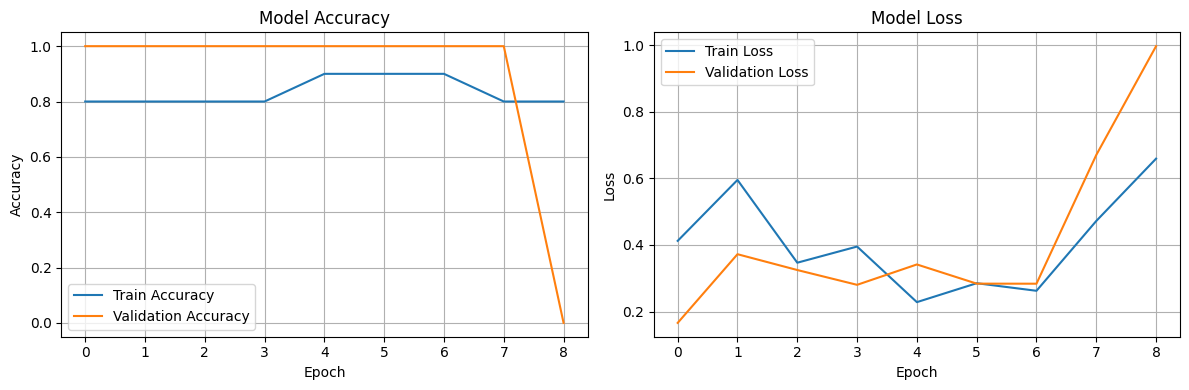


Saving model in multiple formats...


Saved as tenun_classifier.keras
Saved as tenun_classifier.h5
INFO:tensorflow:Assets written to: saved_models/tenun_savedmodel/assets


INFO:tensorflow:Assets written to: saved_models/tenun_savedmodel/assets


Saved as SavedModel format
INFO:tensorflow:Assets written to: /var/folders/zl/9cr4j3vn7l5czhs5yjq3_2nr0000gn/T/tmp81__9c9d/assets


INFO:tensorflow:Assets written to: /var/folders/zl/9cr4j3vn7l5czhs5yjq3_2nr0000gn/T/tmp81__9c9d/assets


Saved artifact at '/var/folders/zl/9cr4j3vn7l5czhs5yjq3_2nr0000gn/T/tmp81__9c9d'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor_798')
Output Type:
  TensorSpec(shape=(None, 2), dtype=tf.float32, name=None)
Captures:
  5988318048: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5988781920: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5988781744: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13264661216: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5988781568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5988779280: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5988788960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5988791072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5988792656: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5988785264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5988792480: Ten

W0000 00:00:1753392999.652554  562210 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1753392999.652871  562210 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
2025-07-25 04:36:39.653277: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /var/folders/zl/9cr4j3vn7l5czhs5yjq3_2nr0000gn/T/tmp81__9c9d
2025-07-25 04:36:39.659672: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2025-07-25 04:36:39.659694: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /var/folders/zl/9cr4j3vn7l5czhs5yjq3_2nr0000gn/T/tmp81__9c9d
I0000 00:00:1753392999.739487  562210 mlir_graph_optimization_pass.cc:425] MLIR V1 optimization pass is not enabled
2025-07-25 04:36:39.755691: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2025-07-25 04:36:40.340276: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /var/folder

Saved as TensorFlow Lite (.tflite)
Saved model metadata

Testing prediction on img-test.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 856ms/step
PREDICTION RESULT
Raw Prediction: manusia
Confidence: 67.65%
Final Label: UNCERTAIN
Status: LOW CONFIDENCE
Probabilities:
  - ayam: 32.35%
  - manusia: 67.65%
 Model is not confident about this prediction.
   Threshold used: 75.0%
   Consider improving image quality or training with more data.

MODEL EXPORT COMPLETED!
Files saved in 'saved_models/' directory:
   ├── tenun_classifier.keras     (Recommended for TensorFlow)
   ├── tenun_classifier.h5        (Compatible with older versions)
   ├── tenun_savedmodel/          (For TensorFlow Serving)
   ├── tenun_classifier.tflite    (For mobile/edge devices)
   ├── best_model.h5              (Best model during training)
   └── model_metadata.json        (Model information)

Use tenun_classifier.keras for backend deployment!


In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import json
import os
from datetime import datetime

# Set random seed untuk hasil konsisten
def set_seed(seed=42):
    tf.random.set_seed(seed)
    np.random.seed(seed)
    import random
    random.seed(seed)

set_seed(42)

data_dir = "tenun_dataset"
img_size = (224, 224)
batch_size = 2

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    validation_split=0.18
)

train_gen = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_gen = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

print(f"Training samples: {train_gen.samples}")
print(f"Validation samples: {val_gen.samples}")
print(f"Classes found: {train_gen.class_indices}")

base_model = MobileNetV2(
    input_shape=img_size + (3,),
    include_top=False,
    weights='imagenet'
)

base_model.trainable = True
for layer in base_model.layers[:-20]:
    layer.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(2, activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# Create model directory
model_dir = "saved_models"
os.makedirs(model_dir, exist_ok=True)

# Callback untuk save model terbaik
checkpoint_callback = ModelCheckpoint(
    filepath=os.path.join(model_dir, 'best_model.h5'),
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=False,
    mode='max',
    verbose=1
)

callbacks = [
    EarlyStopping(
        monitor='val_loss',
        patience=8,
        restore_best_weights=True,
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=3,
        min_lr=1e-7,
        verbose=1
    ),
    checkpoint_callback
]

print("Starting model training...")
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=30,
    callbacks=callbacks,
    verbose=1
)

# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Save model dalam berbagai format
print("\nSaving model in multiple formats...")

# 1. Keras native format (.keras) - Recommended
model.save(os.path.join(model_dir, 'tenun_classifier.keras'))
print("Saved as tenun_classifier.keras")

# 2. H5 format untuk kompatibilitas
model.save(os.path.join(model_dir, 'tenun_classifier.h5'))
print("Saved as tenun_classifier.h5")

# 3. SavedModel format untuk TensorFlow Serving
tf.saved_model.save(model, os.path.join(model_dir, 'tenun_savedmodel'))
print("Saved as SavedModel format")

# 4. TensorFlow Lite untuk mobile/edge deployment
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

with open(os.path.join(model_dir, 'tenun_classifier.tflite'), 'wb') as f:
    f.write(tflite_model)
print("Saved as TensorFlow Lite (.tflite)")

# 5. Save model metadata
model_metadata = {
    'model_name': 'tenun_classifier',
    'version': '1.0',
    'created_date': datetime.now().isoformat(),
    'input_shape': list(img_size) + [3],
    'classes': train_gen.class_indices,
    'class_names': list(train_gen.class_indices.keys()),
    'num_classes': len(train_gen.class_indices),
    'training_samples': train_gen.samples,
    'validation_samples': val_gen.samples,
    'best_val_accuracy': max(history.history['val_accuracy']),
    'best_val_loss': min(history.history['val_loss']),
    'preprocessing': {
        'rescale': 1./255,
        'target_size': img_size
    },
    'confidence_threshold': 75.0
}

with open(os.path.join(model_dir, 'model_metadata.json'), 'w') as f:
    json.dump(model_metadata, f, indent=2)
print("Saved model metadata")

# Function untuk prediksi (untuk testing)
def predict_with_uncertainty(model, img_path, confidence_threshold=75.0):
    img = image.load_img(img_path, target_size=img_size)
    img_array = image.img_to_array(img) / 255.
    img_array = np.expand_dims(img_array, axis=0)

    pred = model.predict(img_array)
    label_map = train_gen.class_indices
    inv_map = {v: k for k, v in label_map.items()}

    predicted_class = np.argmax(pred)
    confidence = np.max(pred) * 100

    if confidence >= confidence_threshold:
        final_label = inv_map[predicted_class]
        status = "CONFIDENT"
        color = "green"
    else:
        final_label = "UNCERTAIN"
        status = "LOW CONFIDENCE"
        color = "orange"

    print("="*50)
    print("PREDICTION RESULT")
    print("="*50)
    print(f"Raw Prediction: {inv_map[predicted_class]}")
    print(f"Confidence: {confidence:.2f}%")
    print(f"Final Label: {final_label}")
    print(f"Status: {status}")
    print("Probabilities:")
    for class_name, prob in zip(inv_map.values(), pred[0]):
        print(f"  - {class_name}: {prob*100:.2f}%")

    if final_label == "UNCERTAIN":
        print(" Model is not confident about this prediction.")
        print(f"   Threshold used: {confidence_threshold}%")
        print("   Consider improving image quality or training with more data.")

    return {
        'raw_prediction': inv_map[predicted_class],
        'final_label': final_label,
        'confidence': confidence,
        'probabilities': pred[0].tolist(),
        'is_uncertain': final_label == "UNCERTAIN"
    }

# Test prediksi jika ada file test
try:
    img_path = 'img-test.png'
    if os.path.exists(img_path):
        print(f"\nTesting prediction on {img_path}")
        result = predict_with_uncertainty(model, img_path, confidence_threshold=75.0)
    else:
        print(f"\nTest image {img_path} not found")
except Exception as e:
    print(f"Error during prediction test: {e}")

print("\n" + "="*70)
print("MODEL EXPORT COMPLETED!")
print("="*70)
print("Files saved in 'saved_models/' directory:")
print("   ├── tenun_classifier.keras     (Recommended for TensorFlow)")
print("   ├── tenun_classifier.h5        (Compatible with older versions)")
print("   ├── tenun_savedmodel/          (For TensorFlow Serving)")
print("   ├── tenun_classifier.tflite    (For mobile/edge devices)")
print("   ├── best_model.h5              (Best model during training)")
print("   └── model_metadata.json        (Model information)")
print("\nUse tenun_classifier.keras for backend deployment!")
print("="*70)